In [38]:
import numpy as np
import pandas as pd

from datetime import datetime as dt

import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 8.12 ms


In [7]:
data = pd.read_csv('./Film_Permits.csv', parse_dates=['StartDateTime', 'EndDateTime'])

time: 13.7 s


In [53]:
data.head()

,EventID,EventType,StartDateTime,EndDateTime,EnteredOn,EventAgency,ParkingHeld,Borough,CommunityBoard(s),PolicePrecinct(s),Category,SubCategoryName,Country,ZipCode(s),StartEnd,TimeList
0,492308,Shooting Permit,2019-06-17 06:00:00,2019-06-17 22:00:00,06/14/2019 05:40:57 PM,"Mayor's Office of Film, Theatre & Broadcasting",MADISON AVENUE between EAST 82 STREET and EA...,Manhattan,"64, 8","19, 22",Film,Feature,United States of America,"10028, 10075","[2019-06-17 06:00:00, 2019-06-17 22:00:00]","DatetimeIndex(['2019-06-17 06:00:00', '2019-06..."
1,492307,Shooting Permit,2019-06-16 06:00:00,2019-06-16 22:00:00,06/14/2019 05:40:06 PM,"Mayor's Office of Film, Theatre & Broadcasting",MADISON AVENUE between EAST 82 STREET and EA...,Manhattan,"64, 8","19, 22",Film,Feature,United States of America,"10028, 10075","[2019-06-16 06:00:00, 2019-06-16 22:00:00]","DatetimeIndex(['2019-06-16 06:00:00', '2019-06..."
2,492280,Shooting Permit,2019-06-17 10:00:00,2019-06-17 23:59:00,06/14/2019 04:33:55 PM,"Mayor's Office of Film, Theatre & Broadcasting",WEST 40 STREET between 5 AVENUE and 6 AVENUE...,Manhattan,5,14,Film,Feature,United States of America,10018,"[2019-06-17 10:00:00, 2019-06-17 23:59:00]","DatetimeIndex(['2019-06-17 10:00:00', '2019-06..."
3,492226,Shooting Permit,2019-06-17 06:30:00,2019-06-17 21:30:00,06/14/2019 01:52:20 PM,"Mayor's Office of Film, Theatre & Broadcasting",FLUSHING AVENUE between CYPRESS AVENUE and SCO...,Brooklyn,"1, 4","83, 90",Television,Episodic series,United States of America,11237,"[2019-06-17 06:30:00, 2019-06-17 21:30:00]","DatetimeIndex(['2019-06-17 06:30:00', '2019-06..."
4,492174,Shooting Permit,2019-06-17 07:00:00,2019-06-17 23:00:00,06/14/2019 10:54:36 AM,"Mayor's Office of Film, Theatre & Broadcasting",EAST 140 STREET between LOCUST AVENUE and WAL...,Bronx,1,40,Television,Episodic series,United States of America,10454,"[2019-06-17 07:00:00, 2019-06-17 23:00:00]","DatetimeIndex(['2019-06-17 07:00:00', '2019-06..."


time: 64.6 ms


In [16]:
# Make histogram by hour of day.
# Break each time range into hour chunks

def range_to_list(a, b):
    return pd.date_range(a, b, freq = 'H')[:-1]
    
# range_to_list(data.iloc[10]['StartDateTime'], data.iloc[10]['EndDateTime'])[:-1]

time: 2.28 ms


In [17]:
data['StartEnd'] = [[i, j] for i, j in zip( data['StartDateTime'], data['EndDateTime'])]
data['TimeList'] = data['StartEnd'].apply(lambda x: range_to_list(x[0], x[1]))

time: 13.4 s


In [21]:
time_list = [j for i in data['TimeList'] for j in i]
time_list_hour = [i.hour for i in time_list]
time_list_day = [i.day for i in time_list]
time_list_month = [i.month for i in time_list]

time: 2.26 s


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


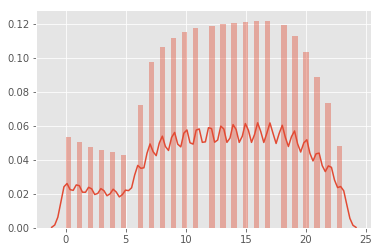

time: 4.82 s


In [39]:
# plt.hist(time_list_hour)
sns.distplot(time_list_hour)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


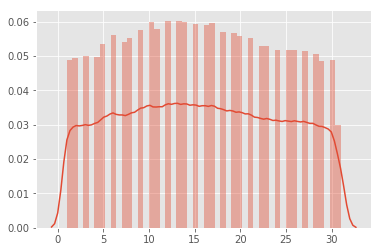

time: 3.99 s


In [50]:
sns.distplot(time_list_day)

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


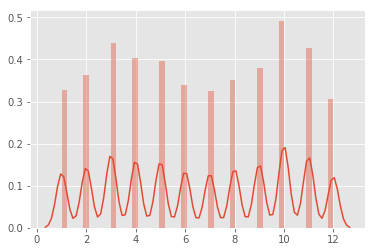

time: 4.47 s


In [52]:
sns.distplot(time_list_month)